Model building

Visualization (2D using PCA)

Prediction on unknown instance

Hyperparameter tuning using GridSearchCV

In [1]:
# Step 1: Import Libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np




In [2]:
# Step 2: Load Iris Dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target



In [3]:
# Step 3: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [4]:
# Step 4: Create SVM Model (default kernel is 'rbf')
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)



SVC(kernel='linear', random_state=42)

In [5]:
# Step 5: Evaluate Model
y_pred = svm_model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))




Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy: 1.0


In [6]:
# Step 6: Predict Unknown Instance
unknown_instance = [[5.9, 3.0, 5.1, 1.8]]
prediction = svm_model.predict(unknown_instance)
print("\nPredicted class for unknown instance:", iris.target_names[prediction[0]])




Predicted class for unknown instance: virginica


In [7]:
# Step 7: Visualize Using PCA (2D)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Retrain SVM on reduced 2D data for visualization
svm_vis = SVC(kernel='linear', C=1.0)
svm_vis.fit(X_reduced, y)



SVC(kernel='linear')

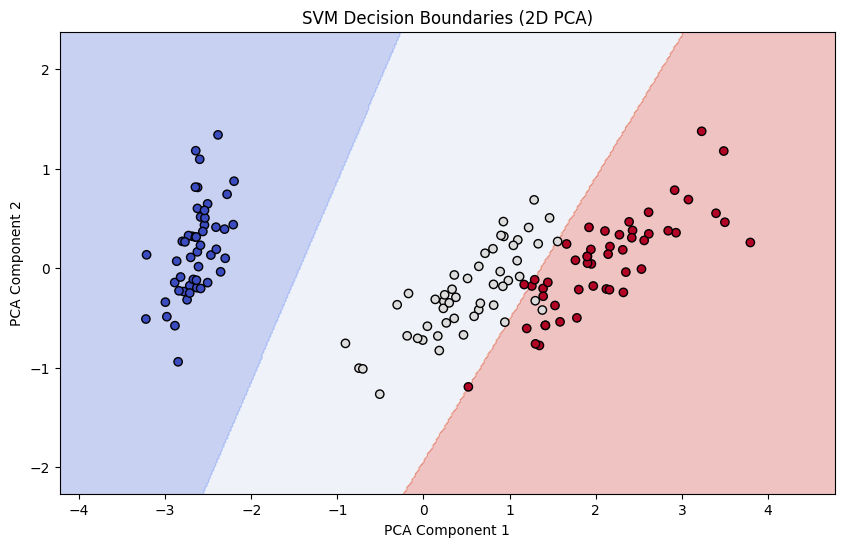

In [8]:
# Plot decision boundaries
def plot_decision_boundary(model, X, y):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title("SVM Decision Boundaries (2D PCA)")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

plot_decision_boundary(svm_vis, X_reduced, y)



In [9]:
# Step 8: Grid Search for Best Hyperparameters
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("\nBest Parameters from Grid Search:", grid.best_params_)




Best Parameters from Grid Search: {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}


In [10]:
# Step 9: Evaluate Best Model
best_svm = grid.best_estimator_
y_best_pred = best_svm.predict(X_test)
print("\nAccuracy of Best Model:", accuracy_score(y_test, y_best_pred))


Accuracy of Best Model: 0.9777777777777777
